<a href="https://colab.research.google.com/github/andrernq/Imersao-Python-Alura/blob/main/Cria%C3%A7%C3%A3o_de_gr%C3%A1ficos_de_Candlesticks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Candlestick Chart](https://i.imgur.com/84LtMlN.png)


![Candlestick](https://www.bussoladoinvestidor.com.br/wp-content/uploads/2019/12/upload_cms_candlestick_Candlestick1.png)

Fonte: https://www.bussoladoinvestidor.com.br/grafico-de-candlestick/

In [53]:
!pip install mplfinance

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Importando a base de dados


In [55]:
dados = yf.download('PETR4.SA',
                    start = '2023-01-01',
                    end = '2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


#### Ajustando a base de dados e criando gráficos com Matplotlib

In [56]:
dados.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [57]:
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Ajust', 'Volume']
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [58]:
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


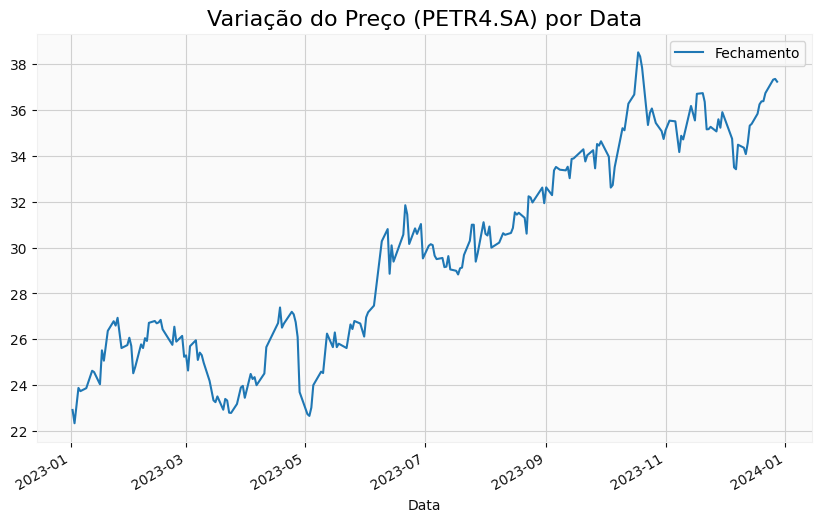

In [59]:
dados.Fechamento.plot(figsize = (10, 6))
plt.title('Variação do Preço (PETR4.SA) por Data', fontsize = 16)
plt.legend(['Fechamento'])

In [60]:
df = dados.head(60).copy()

In [61]:
# Converter o índice em uma coluna de data
df['Data'] = df.index

# Converter as datas para o formato numérico do Matplotlib
'''
Essa conversão é necessária para que o Matplotlib plote as datas corretamente no gráfico.
Apesar de estarem em formato de datas, elas correspondem a números inteiros.
'''
df.Data = df.Data.apply(mdates.date2num)

df.head()

,Abertura,Maximo,Minimo,Fechamento,Fech_Ajust,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451233,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343061,51851500,19363.0


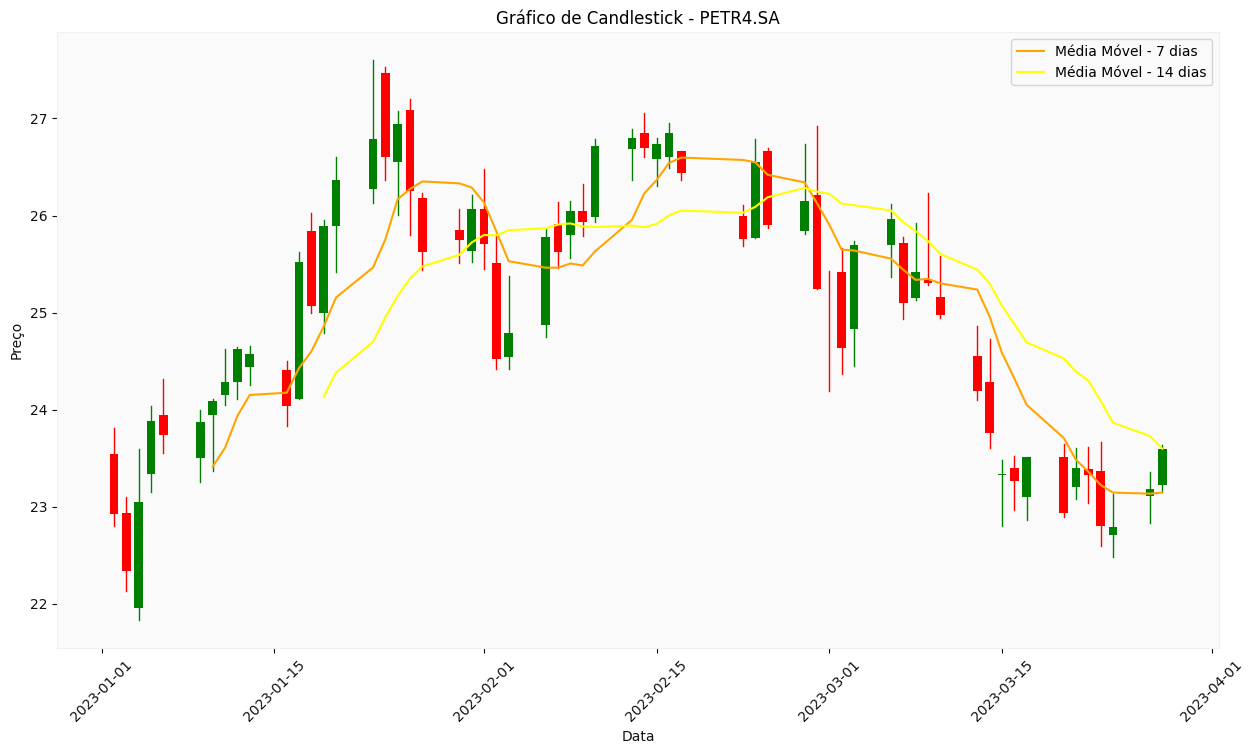

In [62]:
# Criar o espaço onde será mostrada o gráfico
fig, ax = plt.subplots(figsize = (15, 8))

# Definir a largura dos candles no gráfico
width = 0.7

# Definir a cor dos candles
'''
Se o preço do fechamento for maior que o da abertura, o candle é verde (ação valorizou).
Se o preço do fechamento for menor que o da abertura, o candle é vermelho (ação desvalorizou).
'''
for i in range(len(df)):                                                        # "len" é o tamanho do df (60) e "range" para contar de 0 a 59
  if df.Fechamento.iloc[i] > df.Abertura.iloc[i]:
    color = 'green'
  else:
    color = 'red'

# Desenhar a linha vertical do candle (mecha)
  '''
  Essa linha mostra os preços máximo (topo) e mínimo (base) do dia.
  '''
  ax.plot([df.Data.iloc[i], df.Data.iloc[i]],                                   # "ax.plot" para desenhar a linha vertical
          [df.Minimo.iloc[i], df.Maximo.iloc[i]],                               # "[df.Data.iloc[i], df.Data.iloc[i]]" define o ponto x da linha (data)
          color = color,                                                        # "[df.Minimo.iloc[i], df.Maximo.iloc[i]]" define a altura da linha
          linewidth = 1)

# Desenhar os retângulos ("add_patch": método para adicionar objetos)
  ax.add_patch(plt.Rectangle((df.Data.iloc[i] - width/2, min(df.Abertura.iloc[i], df.Fechamento.iloc[i])), # "df.Data.iloc[i] - width/2" define a posição do retângulo ao longo do eixo x, centralizando-o
                             width,                                                                        # "min(df.Abertura.iloc[i], df.Fechamento.iloc[i])" define o ponto onde o retângulo começa, valor mínimo entre abertura e fechamento
                             abs(df.Fechamento.iloc[i] - df.Abertura.iloc[i]),                             # "abs(df.Fechamento.iloc[i] - df.Abertura.iloc[i])" número positivo (abs) que define a altura do retângulo
                             facecolor = color))

# Criar as colunas das médias móveis de 7 e 14 dias
df['MA7'] = df.Fechamento.rolling(window = 7).mean()
df['MA14'] = df.Fechamento.rolling(window = 14).mean()

# Plotar as médias móveis para 7 e 14 dias
ax.plot(df.Data, df.MA7, color = 'orange', label = 'Média Móvel - 7 dias' )
ax.plot(df.Data, df.MA14, color = 'yellow', label = 'Média Móvel - 14 dias' )

# Adicionar legenda para as médias móveis
ax.legend()

# Formatar o eixo x para mostrar as datas
ax.xaxis_date()                                                                 # O método "xaxis.date()" é usado para mostrar ao Matplotlib que as datas estão no eixo x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))                  # Configurar o formato da data e a rotação apresentada no g
plt.xticks(rotation = 45)

# Adicionando título e rótulos para os eixos x e y
plt.title('Gráfico de Candlestick - PETR4.SA')
plt.xlabel('Data')
plt.ylabel('Preço')

# Adicionando uma grade para facilitar a visualização dos valores
plt.grid()

# Exibindo o gráfico
plt.show()


#### Criação de gráficos com a biblioteca Plotly

In [68]:
# Criar subplots
'''
Aqui criaremos a figura que irá conter os gráficos.
É possível ter vários gráficos numa única visualização.
Neste exemplo, teremos dois subplots:
Acima, o primeiro que conterá o gráfico de candlesticks;
Abaixo, o segundo para o gráfico de volume de transações.
'''
fig = make_subplots(rows = 2,
                    cols = 1,
                    shared_xaxes = True,
                    vertical_spacing = 0.1,
                    subplot_titles = ('Candlestick', 'Volume transacionado'),
                    row_width = [0.2, 0.7])

# Adicionar o gráfico de candlestick
'''
No gráfico de candlestick, cada candle representa um dia de negociação.
Os dados são preço de abertura e fechamento, e valores mínimo e máximo.
'''
fig.add_trace(go.Candlestick(x = df.index,
                             open = df.Abertura,
                             high = df.Maximo,
                             low = df.Minimo,
                             close = df.Fechamento,
                             name = 'Candlestick'),
              row = 1,                                                          # Primeiro subplot, linha 1
              col = 1)

# Adicionar as médias móveis para análise das tendências
fig.add_trace(go.Scatter(x = df.index,
                         y = df.MA7,
                         mode = 'lines',
                         name = 'MA7 - Média Móvel 7 dias'),
              row = 1,
              col = 1)

fig.add_trace(go.Scatter(x = df.index,
                         y = df.MA14,
                         mode = 'lines',
                         name = 'MA14 - Média Móvel 14 dias'),
              row = 1,
              col = 1)

# Adicionar o gráfico de barras para o volume de transações
fig.add_trace(go.Bar(x = df.index,
                     y = df.Volume,
                     name = 'Volume'),
              row = 2,                                                          # Segundo subplot, linha 2
              col = 1)

# Atualizar layout, ajustar título, formato dos eixos e melhorar legibilidade
fig.update_layout(yaxis_title = 'Preço',
                  xaxis_rangeslider_visible = False,                            # "xaxis_rangeslider_visible = False" desativa o range slider
                  width = 1100,
                  height = 600)

# Mostrar o gráfico
fig.show()

#### Criação de gráficos com a biblioteca Mplfinance

In [64]:
dados = yf.download('PETR4.SA',
                    start = '2023-01-01',
                    end = '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


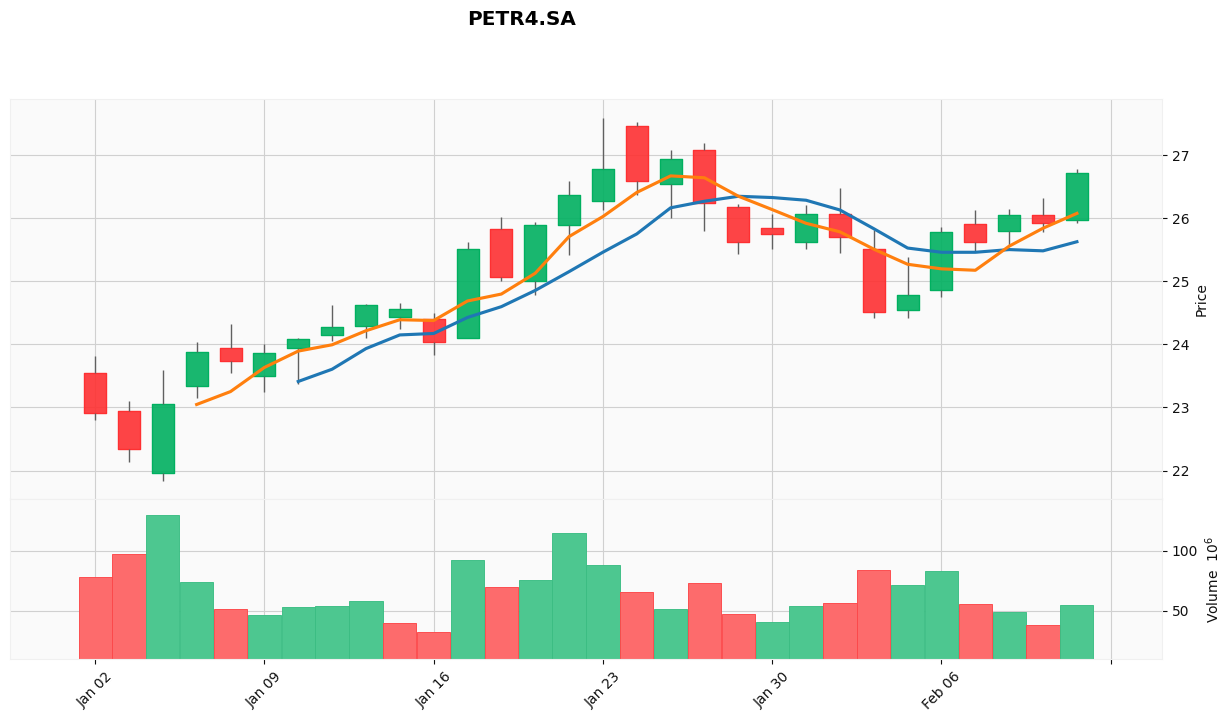

In [65]:
mpf.plot(dados.head(30),
         type = 'candle',
         figsize = (16, 8),
         volume = True,
         mav = (7, 4),
         style = 'yahoo',
         title = 'PETR4.SA')

In [66]:
dados1 = yf.download('AAPL',
                      start = '2023-01-01',
                      end = '2023-12-31')

[*********************100%%**********************]  1 of 1 completed


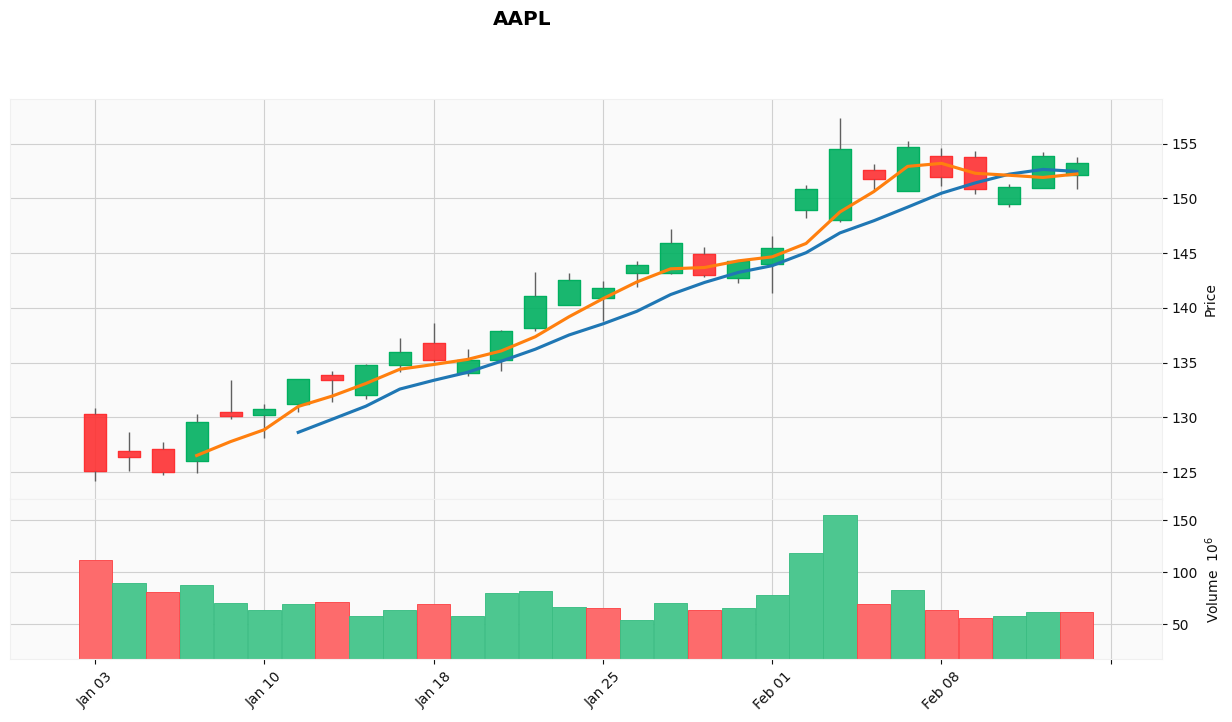

In [67]:
mpf.plot(dados1.head(30),
         type = 'candle',
         figsize = (16, 8),
         volume = True,
         mav = (7, 4),
         style = 'yahoo',
         title = 'AAPL')